# LAB2: END-TO-END MACHINE LEARNING PROJECT “FACE DETECTION APPLICATION”

Réalisé par : Chayma Ben Abdeljelil & Haifa Khiari 3DNI2

1. Feature Engineering

In [21]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people() 
positive_patches = faces.images

In [23]:
#Q1:
positive_patches.shape

(13233, 62, 47)

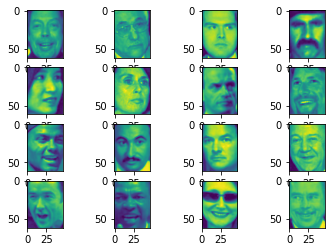

In [25]:
#Q2:
import matplotlib.pyplot as plt
for i in range (16):
  plt.subplot(4,4,i+1)
  plt.imshow(positive_patches[i,:,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


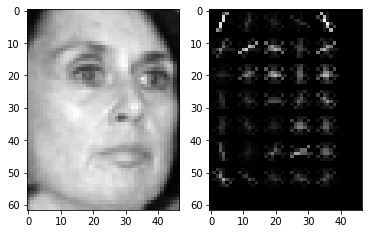

In [27]:
#Q3:
from skimage import color, feature
import skimage.data
sample=positive_patches[5]
img = color.rgb2gray(sample) 
hog_vec, hog_vis = feature.hog(img, visualize=True)
plt.subplot(1,2,1),plt.imshow(sample,cmap='gray')
plt.subplot(1,2,2),plt.imshow(hog_vis,cmap='gray')
hog_vec.shape[0]
dim = hog_vec.shape[0]

In [28]:
from skimage import data, transform
import numpy as np
from sklearn.feature_extraction.image import PatchExtractor
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
        extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
        extractor = PatchExtractor(patch_size=extracted_patch_size,
        max_patches=N, random_state=0)
        patches = extractor.transform(img[np.newaxis])
        if scale != 1:
                patches= np.array([transform.resize(patch, patch_size)
                for patch in patches])
        return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale)
        for im in images for scale in [0.5, 1.0, 2.0]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


In [31]:
#Q4:
negative_patches.shape

(30000, 62, 47)

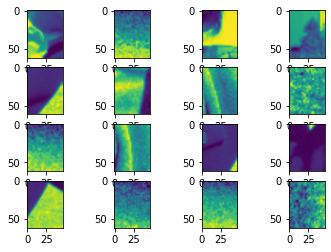

In [32]:
#Q5:
import matplotlib.pyplot as plt
for i in range (16):
  plt.subplot(4,4,i+1)
  plt.imshow(negative_patches[i,:,:])

In [33]:
#Q6:
import pandas as pd
type(positive_patches)
combine= np.concatenate([positive_patches, negative_patches])
combine.shape

(43233, 62, 47)

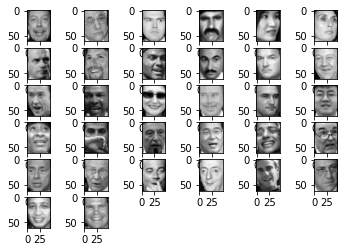

In [34]:
for i in range(32):
  plt.subplot(6,6,i+1)
  plt.imshow(combine[i,:,:], cmap='gray')



In [35]:
N=min(positive_patches.shape[0],negative_patches.shape[0])
print(N)

13233


In [36]:
#Q7:
n=min(positive_patches.shape[0],negative_patches.shape[0])
dim=hog_vec.shape[0]
X=np.zeros((2*n,dim))
Y=np.concatenate((np.ones((n,1)),np.zeros((n,1))), axis=0)
for i in range(n):
  img=positive_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  X[i,:]=hog_vec.reshape(1,dim)
for i in range(n):
  img=negative_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  X[i+n,:]=hog_vec.reshape(1,dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  del sys.path[0]


In [37]:
print(X.shape)
print(Y.shape)

(26466, 1215)
(26466, 1)


2. Binary Classification using Scikit-Learn

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21172, 1215), (5294, 1215), (21172, 1), (5294, 1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
models = [
 { "estimater": KNeighborsClassifier(),
  "params": {
    "n_neighbors": [5] ,#,25,30,35,45],
    "weights": ['uniform'],#,'distance'],
    "leaf_size": [25],#,30,35],
    "p": [1],#,2,3],
  }
 },
 { "estimater": DecisionTreeClassifier(),
  "params": {
    "criterion": ['gini'],#,'entropy'],
    "splitter": ['best'],#,'random'],
    "max_depth": [None],#,90,95,100],
    "max_features": [None],#, "auto","sqrt","log2"],
    "random_state": [42]
  }
 },

 { "estimater": svm.SVC(),
 "params": { 'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
 },
 { "estimater": RandomForestClassifier(),
  "params": {
    "criterion": ['gini'],#,'entropy'],
    "bootstrap": [True],#, False],
    "max_depth": [85],#,90,95,100],
    "max_features": ['sqrt'],#,'log2'],
    "n_estimators": [60],#, 80, 90],
    "random_state": [42]
  }
 }
]
column_names = ["KNeighbors", "DecisionTree", "SVM", "RF"]
entries = []
max_acc = 0
best_model = None
for model in models:
 print(model["estimater"])
 # Create model
 clf = model["estimater"]
 # Instantiate the grid search model
 grid_search = GridSearchCV(estimator = clf, param_grid = model["params"],
 cv = 5)

 # Fit the model
 grid_search.fit(X_train, y_train)
 # Make predictions on the test set compute accuracy metric
 predicted = grid_search.predict(X_test)
 acc = accuracy_score(predicted, y_test)
 entries.append(acc)
 print(grid_search.best_params_)
 # Get the best model with the highest accuracy
 if acc > max_acc:
  max_acc = acc
  best_model = grid_search

KNeighborsClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'leaf_size': 25, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
DecisionTreeClassifier()
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'best'}
SVC()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#Q8:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.DataFrame({"Estimator": column_names, "Accuracy": entries})
plt.figure(figsize=(8, 4))
sns.barplot(x='Estimator', y='Accuracy', data=df)
print(df)

Conclusions:
- First, We downloaded the dataset.
- We imported the necessary libraries.
- For the features engineering, we showed the positive and the negative patchs.
- We splited the data into training and test sets.
- We built 4 binary classifiers and trained them.
- Finally, We evaluated these classifiers.
